### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here: 

<hr style="height:2pt">

In [1]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: 'cs109.css'

![bike_sharing](fig/BSS.png)

<div class="theme">  Main Theme: Multiple Linear Regression, Subset Selection, Polynomial Regression </div>
### Overview 

You are hired by the administrators of the [Capital Bikeshare program](https://www.capitalbikeshare.com) program in Washington D.C., to **help them predict the hourly demand for rental bikes** and **give them suggestions on how to increase their revenue**. You will prepare a small report for them.

The hourly demand information would be useful in planning the number of bikes that need to be available in the system on any given hour of the day, and also in monitoring traffic in the city. It costs the program money if bike stations are full and bikes cannot be returned, or empty and there are no bikes available. You will use multiple linear regression and polynomial regression and will explore techniques for subset selection. The goal is to build a regression model that can predict the total number of bike rentals in a given hour of the day, based on attributes about the hour and the day. 

An example of a suggestion to increase revenue might be to offer discounts during certain times of the day either during holidays or non-holidays. Your suggestions will depend on your observations of the seasonality of ridership.

The data for this problem were collected from the Capital Bikeshare program over the course of two years (2011 and 2012).


### Use only the libraries below:

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

import seaborn as sns


%matplotlib inline

## Data Exploration & Preprocessing, Multiple Linear Regression, Subset Selection


### Overview
The initial data set is provided in the file `data/BSS_hour_raw.csv`. You will add some features that will help us with the analysis and then separate it into training and test sets. Each row in this file contains 12 attributes and each entry represents one hour of a 24-hour day with its weather, etc, and the number of rental rides for that day divided in categories according to if they were made by registered or casual riders. Those attributes are the following:

- `dteday` (date in the format YYYY-MM-DD, e.g. 2011-01-01)
- `season` (1 = winter, 2 = spring, 3 = summer, 4 = fall)
- `hour` (0 for 12 midnight, 1 for 1:00am, 23 for 11:00pm)
- `weekday` (0 through 6, with 0 denoting Sunday)
- `holiday` (1 = the day is a holiday, 0 = otherwise)
- `weather`
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm
    - 4: Heavy Rain + Thunderstorm + Mist, Snow + Fog 
- `temp` (temperature in Celsius)
- `atemp` (apparent temperature, or relative outdoor temperature, in Celsius)
- `hum` (relative humidity)
- `windspeed` (wind speed)
- `casual` (number of rides that day made by casual riders, not registered in the system)
- `registered` (number of rides that day made by registered riders)

### General Hints
- Use pandas .describe() to see statistics for the dataset.
- When performing manipulations on column data it is useful and often more efficient to write a function and apply this function to the column as a whole without the need for iterating through the elements.
- A scatterplot matrix or corrleation matrix are both good ways to see dependencies between multiple variables.
- For Question 2, a very useful pandas method is .groupby(). Make sure you aggregate the rest of the columns in a meaningful way. Print the dataframe to make sure all variables/columns are there!

### Resources 
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

<div class="exercise"> <b> Question 1: Explore how Bike Ridership varies with Hour of the Day </b> </div>

#### Learn your Domain and Perform a bit of Feature Engineering

**1.1** Load the dataset from the csv file `data/BSS_hour_raw.csv` into a pandas dataframe that you name `bikes_df`. Do any of the variables' ranges or averages seem suspect? Do the data types make sense?

**1.2** Notice that the variable in column `dteday` is a pandas `object`, which is **not**  useful when you want to extract the elements of the date such as the year, month, and day. Convert `dteday` into a `datetime` object to prepare it for later analysis.

**1.3** Create three new columns in the dataframe:
- `year` with 0 for 2011 and 1 for 2012.
- `month` with 1 through 12, with 1 denoting Jan. 
- `counts` with the total number of bike rentals for that day (this is the response variable for later).

**1.4** Use visualization to inspect and comment on how **casual** rentals and **registered** rentals vary with the `hour`. 

**1.5** Use the variable `holiday` to show how **holidays** affect the relationship in question 1.4.  What do you observe? 

**1.6** Use visualization to show how **weather** affects **casual** and **registered** rentals. What do you observe? 

### Answers

#### 1.1 Load the dataset from the csv file  ...

In [3]:
# your code here


<HR>
Your answer here<BR>
<BR>
<HR>

In [4]:
bikes_df = pd.read_csv('data/BSS_hour_raw.csv')
bikes_df.head()

,dteday,season,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered
0,2011-01-01,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,2011-01-01,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,2011-01-01,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,2011-01-01,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,2011-01-01,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [5]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
dteday        17379 non-null object
season        17379 non-null int64
hour          17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


In [6]:
bikes_df.describe()

,season,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869
std,1.106918,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000
50%,3.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000
75%,3.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000
max,4.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000


<HR>

We see that Washington, DC recorded a wide-range of temperatures spanning from 20.0oF to 100.0o F. The city is fairly humid with an average relative humidity of 62.7% and a standard deviation of 19.2. The average wind speed was 19 MPH; Fog and thunderstorms were rare but rain and snow occured more often. The temperature variable seems to have been normalized to range from 0 to 1, or else DC saw high of 100 degrees and a low of 0 degrees farenheight.

All data types make sense for the data stored, except dteday, which is an object.

<HR>

#### 1.2 Notice that the variable in column ....

In [7]:
# your code here


In [8]:
bikes_df.dtypes

dteday         object
season          int64
hour            int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
dtype: object

In [9]:
# covert to datetime
bikes_df['dteday'] = pd.to_datetime(bikes_df['dteday'])
bikes_df.dtypes

dteday        datetime64[ns]
season                 int64
hour                   int64
holiday                int64
weekday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
dtype: object

#### 1.3 Create three new columns ...

In [10]:
# your code here


In [11]:
# function to assign 0 to 2011 and 1 to 2012


def encode_year(x):
    return np.int64(np.floor(x-2011))
   
    
# create `year` column
bikes_df.loc[:,'year'] = bikes_df.dteday.dt.year

# create `month` column
bikes_df.loc[:,'month'] = bikes_df.dteday.dt.month
   
# encode `year` column with 0 and 1
bikes_df['year'] = bikes_df['year'].apply(encode_year)

bikes_df['counts'] = bikes_df.casual+ bikes_df.registered

# re-organize the columns 
columns = ['dteday','hour','season', 'holiday', 'year','month','weekday', \
           'workingday','weather', 'temp', 'atemp', 'hum', 'windspeed', \
           'casual', 'registered', 'counts']
bikes_df = bikes_df.reindex(columns = columns)

In [12]:
bikes_df.head()

,dteday,hour,season,holiday,year,month,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,counts
0,2011-01-01,0,1,0,0,1,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,1,0,0,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,2,1,0,0,1,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,3,1,0,0,1,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,4,1,0,0,1,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### 1.4 Use visualization to inspect and comment on how casual rentals and registered rentals vary with the hour. 

In [13]:
# your code here


<HR>
Your answer here<BR>
<BR>
<HR>

In [14]:
# show times in more readable form
ticks_dict = {0: '12:00am', 2: "2:00am", 4: "4:00am", 6: "6:00am", 
              8: "8:00am", 10: '10:00am', 12: '12:00pm', 14: '2:00pm', 
              16:'4:00pm', 18:'6:00pm', 20:'8:00pm', 22:'10:00pm'}   


In [15]:
def get_hourly_violin_lists(bikes_data):

    reg_hourly_data = []
    cas_hourly_data = []
    for cur_hour in range(24):
        cur_registered = bikes_data.loc[bikes_data.hour==cur_hour,'registered'].values.reshape(-1,1)
        cur_casual = bikes_data.loc[bikes_data.hour==cur_hour,'casual'].values.reshape(-1,1)

        reg_hourly_data.append(cur_registered)
        cas_hourly_data.append(cur_casual)

    return reg_hourly_data,cas_hourly_data

In [16]:

mids = bikes_df.groupby("hour").median()[["registered","casual"]]


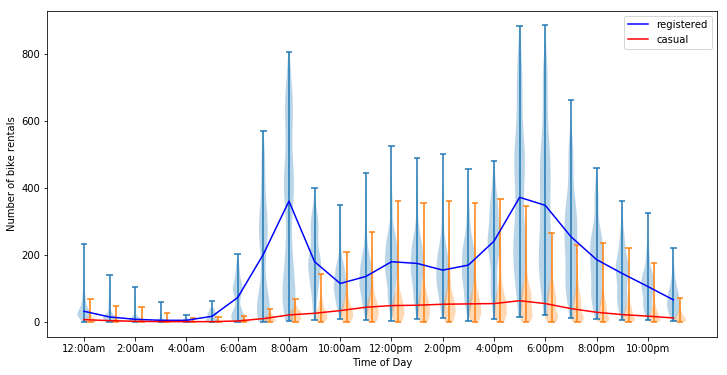

In [17]:
# scatterplot of  distribution of rentals during the day (blue is registered and red is casual)
reg_hourly_data,cas_hourly_data = get_hourly_violin_lists(bikes_df)

plt.figure(figsize=(12,6))
plt.xticks(list(ticks_dict.keys()), list(ticks_dict.values()))
reg = plt.violinplot(dataset=reg_hourly_data, positions=np.arange(24))
cas = plt.violinplot(dataset=cas_hourly_data, positions=np.arange(24)+.25)

med = plt.plot(list(range(24)),mids["registered"].values,c = 'b', label="registered")
medb = plt.plot(list(range(24)),mids["casual"].values,c='r', label="casual")
plt.ylabel('Number of bike rentals')
plt.xlabel('Time of Day')
plt.legend()

plt.show()

We notice that ridership follows a bimodal distribution with peaks corresponding to 8am and 5pm. Those peaks are those of registered riders during the afternoon rush hour, which is around 5:00pm, and during the morning commute, around 8:00am. This makes sense as people who use the bikes to go to work tend to buy season passes. 

We also notice smaller peaks throughout the day, such as around midnight when people come back from a night out. 

Casual ridership follows the same distribution with the **notable absence** of the two large peaks.

#### 1.5 Use the variable holiday to show how holidays affect the relationship in question 1.4. What do you observe?

In [18]:
# your code here


<HR>
Your answer here<BR>
<HR>

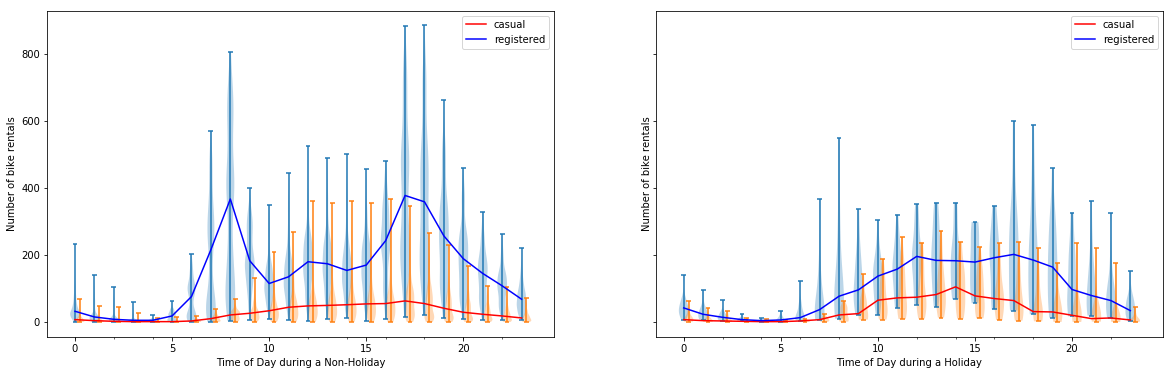

In [19]:
# scatterplot of rentals during a holiday (blue is registered and red is casual)


fig, ax = plt.subplots(1,2, figsize=(20,6),sharey=True)

for cur_holiday in (0,1):
    cur_ax = ax[cur_holiday]
    
    # group data by hour
    bikes_df_holiday = bikes_df[(bikes_df.holiday == cur_holiday)]
    reg_hourly_data,cas_hourly_data = get_hourly_violin_lists(bikes_df_holiday)

    # get medians
    reg_hourly_data_meadian= [np.median(q) for q in reg_hourly_data]
    cas_hourly_data_meadian= [np.median(q) for q in cas_hourly_data]
    
    # plot distribution at each hour
    reg = cur_ax.violinplot(dataset=reg_hourly_data, positions=np.arange(24))
    cas = cur_ax.violinplot(dataset=cas_hourly_data, positions=np.arange(24)+.25)

    cur_ax.plot(cas_hourly_data_meadian, 'r', label="casual")
    cur_ax.plot(reg_hourly_data_meadian, 'b', label="registered")
    
    cur_ax.set_xticks(list(ticks_dict.keys()), list(ticks_dict.values()))
    cur_ax.set_ylabel('Number of bike rentals')
    if cur_holiday == 1:
        cur_ax.set_xlabel('Time of Day during a Holiday')
    else:
        cur_ax.set_xlabel('Time of Day during a Non-Holiday')
    cur_ax.legend()
    
plt.show()

We see lower overall numbers during holidays, as expected. 

We also notice some interesting patterns such scattered points at the two rush hour peaks. Could it be working holidays for some people? If we explore one such point (8:00am, rides > 500) we see that it is 2012-04-16, which is Emancipation Day in DC. That day is a holiday, but neither public nor private sector employees get the day off.

In [20]:
# exploring the (8:00am, rides > 500) point
bikes_df[(bikes_df.holiday == 1) & (bikes_df.hour == 8) & (bikes_df.registered > 500)]

,dteday,hour,season,holiday,year,month,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,counts
11187,2012-04-16,8,2,1,1,4,1,0,2,0.56,0.5303,0.83,0.1642,48,549,597


#### 1.6  Use visualization to show how weather affects casual and registered rentals. What do you observe?

In [21]:
# your code here


<HR>
Your answer here<BR>
<BR>
<HR>

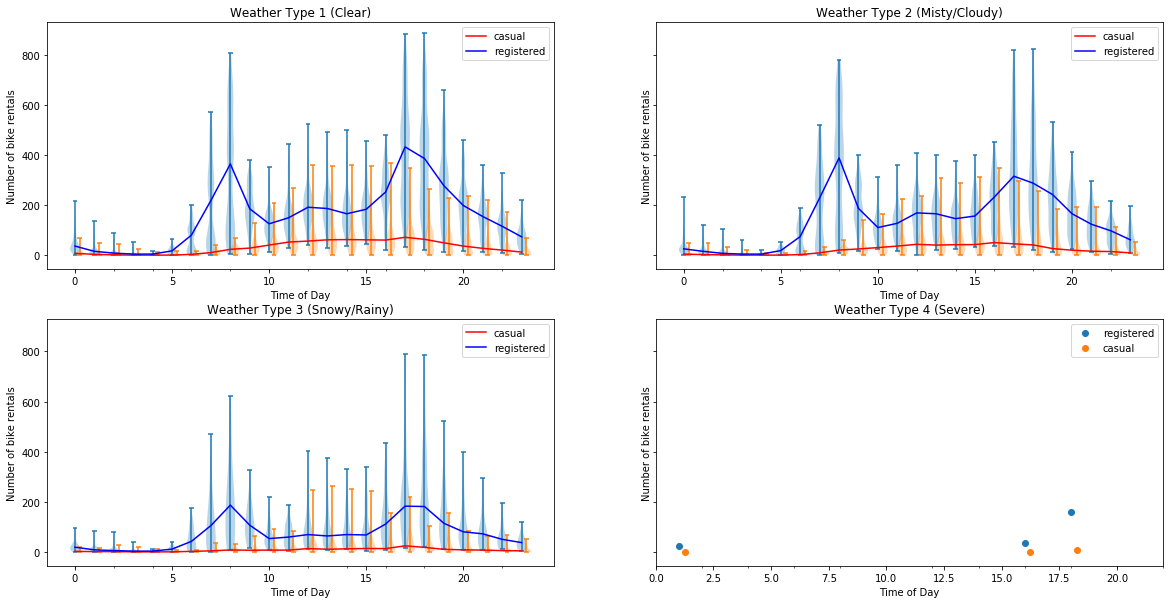

In [22]:
fig, ax = plt.subplots(2,2, figsize=(20,10), sharey=True)
ax = ax.ravel()

weather_strings = ["Clear", "Misty/Cloudy", "Snowy/Rainy", "Severe"]
for cur_weather in range(1,5):
    cur_ax = ax[cur_weather-1]
    cur_weather_string = weather_strings[cur_weather-1]
    
    bikes_df_weather = bikes_df[(bikes_df.weather == cur_weather)]
    
    
    if cur_weather == 4:
        # for blizard weather we have maximum one data point per hour, and often none
        # just scatter plot the data
        reg = cur_ax.scatter(bikes_df_weather['hour'].values, bikes_df_weather['registered'].values, label="registered")
        cas = cur_ax.scatter(bikes_df_weather['hour'].values+.25, bikes_df_weather['casual'].values, label="casual")
    else:
        #for most weathers, we just plot the distribution and median at each hour
        reg_hourly_data,cas_hourly_data = get_hourly_violin_lists(bikes_df_weather)
        reg = cur_ax.violinplot(dataset=reg_hourly_data, positions=np.arange(24))
        cas = cur_ax.violinplot(dataset=cas_hourly_data, positions=np.arange(24)+.25)
        
        reg_hourly_data_meadian= [np.median(q) for q in reg_hourly_data]
        cas_hourly_data_meadian= [np.median(q) for q in cas_hourly_data]
        cur_ax.plot(cas_hourly_data_meadian, 'r', label="casual")
        cur_ax.plot(reg_hourly_data_meadian, 'b', label="registered")
        
    cur_ax.legend()
    
    cur_ax.set_xticks(list(ticks_dict.keys()), list(ticks_dict.values()))
    cur_ax.set_ylabel('Number of bike rentals')
    cur_ax.set_xlabel('Time of Day')
    cur_ax.set_title('Weather Type {} ({})'.format(cur_weather, cur_weather_string))
    

Weather seems to have an effect mostly in casual rentals and this is probably because the registered riders go to work and they do so in all weather. Casuals, on the other hand, which tend to use their bikes for leisure, probably prefer good weather.

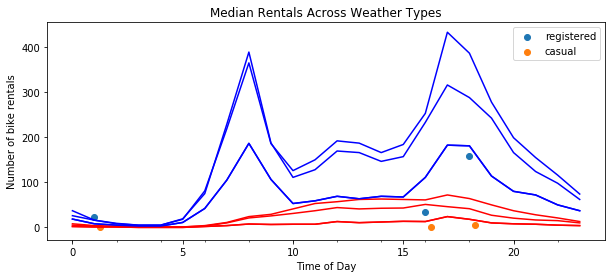

In [23]:
# Investigate the claim above. 
fig, ax = plt.subplots(1,1, figsize=(10,4), sharey=True)


alpha_vals = [.01,.01,.1,1]
weather_strings = ["Clear", "Misty/Cloudy", "Snowy/Rainy", "Severe"]
for cur_weather in range(1,5):
    cur_ax = ax
    cur_alpha = alpha_vals[cur_weather-1]
    cur_weather_string = weather_strings[cur_weather-1]
    
    bikes_df_weather = bikes_df[(bikes_df.weather == cur_weather)]
    
    
    reg_hourly_data_meadian= [np.median(q) for q in reg_hourly_data]
    cas_hourly_data_meadian= [np.median(q) for q in cas_hourly_data]
    cur_ax.plot(cas_hourly_data_meadian, 'r')
    cur_ax.plot(reg_hourly_data_meadian, 'b')
    
    
    
    if cur_weather == 4:
        reg = cur_ax.scatter(bikes_df_weather['hour'].values, bikes_df_weather['registered'].values, alpha=cur_alpha, label="registered")
        cas = cur_ax.scatter(bikes_df_weather['hour'].values+.25, bikes_df_weather['casual'].values, alpha=cur_alpha, label="casual")
        cur_ax.legend()
    else:
        reg_hourly_data,cas_hourly_data = get_hourly_violin_lists(bikes_df_weather)
        #reg = cur_ax.violinplot(dataset=reg_hourly_data, positions=np.arange(24))
        #cas = cur_ax.violinplot(dataset=cas_hourly_data, positions=np.arange(24)+.25)
    
    cur_ax.set_xticks(list(ticks_dict.keys()), list(ticks_dict.values()))
    cur_ax.set_ylabel('Number of bike rentals')
    cur_ax.set_xlabel('Time of Day')
    cur_ax.set_title('Median Rentals Across Weather Types')


### Previous claim seems to be totally unsabstantiated. Obvious tha there is no substantial difference depending on the weather. 

<div class='exercise'> <b> Question 2: Explore Seasonality on Bike Ridership. </b></div>
#### Seasonality and weather

Now let's examine the effect of weather and time of the year. For example, you want to see how ridership varies with season of the year. 

**2.1** Make a new dataframe with the following subset of attributes from the previous dataset and with each entry being **ONE** day:

- `dteday`, the timestamp for that day (fine to set to noon or any other time)
- `weekday`, the day of the week
- `weather`, the most severe weather that day
- `season`, the season that day falls in
- `temp`, the average temperature
- `atemp`, the average atemp that day
- `windspeed`, the average windspeed that day
- `hum`, the average humidity that day
- `casual`, the **total** number of rentals by casual users
- `registered`, the **total** number of rentals by registered users
- `counts`, the **total** number of rentals

Name this dataframe `bikes_by_day` and use it for all of Question 2.

**2.2** How does **season** affect the number of bike rentals for **casual riders** or **registered riders** per day? Use the variable `season` for this question. Comment on your observations. 

**2.3** What percentage of rentals are made by casual riders or registered riders for each day of the week? Comment on any patterns you see and give a possible explanation.

**2.4** How is the **distribution of total number of bike rentals** different for sunny days vs cloudy days?

**2.5** Visualize how the **total number of rides** per day varies with the **season**. Do you see any **outliers**? (We define an outlier as a value 1.5 times the IQR above the 75th percentile or 1.5 times the IQR below the 25th percentiles. This is the same rule used by pyplot's boxplot function). If you see any outliers, identify those dates and investigate if they are a chance occurence, an error in the data collection, or a significant event.

#### HINT
- Use .copy() when creating the new dataframe, so you leave the original untouched. We will come back to it later.
- Use .groupby() to creat the new dataframe. You will have to make some choice on how to aggregate the variables.

### Answers

#### 2.1 Make a new dataframe with the following subset ...

In [24]:
# your code here


In [25]:
bikes_by_day = bikes_df.copy()

In [26]:
# for scatterplot of season against counts first we need to group by day and aggregate counts
bikes_by_day = bikes_by_day[['dteday', 'weather', 'season', 'windspeed', 'temp', 'atemp', 'hum', 
                      'weekday', 'casual', 'registered', 'counts']].groupby('dteday').agg({'counts' : np.sum,
                                                                                 'casual' : np.sum,
                                                                                 'weather': np.max,
                                                                                 'registered' : np.sum,
                                                                                 'season' : np.mean,
                                                                                 'weekday' : np.mean,
                                                                                 'windspeed': np.mean,
                                                                                 'temp' : np.mean,
                                                                                 'atemp' : np.mean,
                                                                                 'hum' : np.mean})
bikes_by_day.head(5)

,counts,casual,weather,registered,season,weekday,windspeed,temp,atemp,hum
dteday,,,,,,,,,,
2011-01-01,985,331,3,654,1,6,0.160446,0.344167,0.363625,0.805833
2011-01-02,801,131,3,670,1,0,0.248539,0.363478,0.353739,0.696087
2011-01-03,1349,120,1,1229,1,1,0.248309,0.196364,0.189405,0.437273
2011-01-04,1562,108,2,1454,1,2,0.160296,0.200000,0.212122,0.590435
2011-01-05,1600,82,1,1518,1,3,0.186900,0.226957,0.229270,0.436957


#### 2.2 How does season affect the number of bike ...

In [27]:
# your code here


In [28]:
# scatterplot of season against ridership
def plot_season(data, ylabel):
    
    plt.ylabel(ylabel)
    plt.xlabel('Season')
    plt.yticks([0.0, 2.0, 4.0, 6.0, 8.0])  
    plt.xticks([1.0, 2.0, 3.0, 4.0],
               ["winter", "spring", "summer", "fall"])
    plt.scatter(data['season'].values, data['casual'].values/1000, alpha=0.1 , c='r', label="casual")
    plt.scatter(data['season'].values+.15, data['registered'].values/1000, alpha=0.1 , c='b', label="registered")
    
    plt.legend()
    return plt.show()

plt.style.use('ggplot')

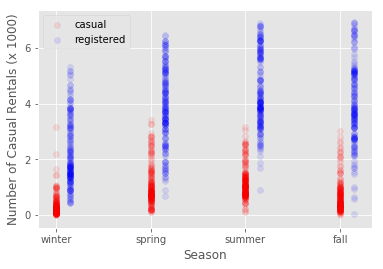

In [29]:
# scatterplot of season vs casual rentals 
plot_season(bikes_by_day, 'Number of Casual Rentals (x 1000)')

<HR>
Your answer here<BR>
<BR>
<HR>

There is an overall trend for more bike use in the spring and summer but we see variation among the two categories of riders. We see that winter is a period with very low rentals by casual riders and that makes sense because these are probably recreational users that do not like to ride in bad weather. One the other hand, winter is high on registered users because they probably use the bikes to go to work. Fall is another low preriod for casual riders and the highest for registered users because fall is work season with good weather generally.

#### 2.3 What percentage of rentals are made by casual riders or registered riders ...

In [30]:
# your code here


In [31]:
days_of_week = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 
                3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday',}

In [32]:
# find the casual riders

weekday_casual_counts = bikes_by_day[['weekday','casual','registered','counts']].\
                        copy().groupby('weekday').aggregate(sum)
n = weekday_casual_counts['counts']
weekday_casual_counts['casual'] = round((weekday_casual_counts['casual']/n*100),2)
weekday_casual_counts['registered'] = round((weekday_casual_counts['registered']/n*100),2)
weekday_casual_counts['counts'] = 100

weekday_casual_counts = weekday_casual_counts.rename(days_of_week)  # rename index for readability
weekday_casual_counts

,casual,registered,counts
weekday,,,
Sunday,31.65,68.35,100
Monday,15.54,84.46,100
Tuesday,12.33,87.67,100
Wednesday,12.12,87.88,100
Thursday,12.66,87.34,100
Friday,16.04,83.96,100
Saturday,32.20,67.80,100


<HR>
Your answer here<BR>
<BR>
<HR>

We see a trend for more registered riders during the week: 84% registered on a Monday vs. 15% casual on the same day, 87% on Tuesday vs. 12% casual. We notice that registered riders use their bikes to go to work and also ride during the weekened in about 25% less frequency. Casual riders, as expected, ride mostly during Saturdays and Sundays with a large decline during the working week.
    
<HR>

#### 2.4 How is the distribution of total number of bike rentals different ...

In [33]:
# your code here


<HR>
Your answer here<BR>
<BR>
<HR>

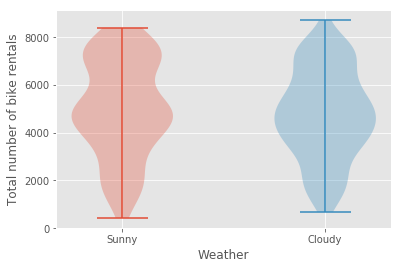

In [34]:
plt.violinplot(bikes_by_day.loc[bikes_by_day.weather==1,'counts'],positions=[1])
plt.violinplot(bikes_by_day.loc[bikes_by_day.weather==2,'counts'],positions=[2])

plt.xlabel("Weather")
plt.xticks([1,2], ["Sunny","Cloudy"])
plt.ylabel("Total number of bike rentals")
plt.show()

On sunny days, ridership is bimodal, at around either 5000 total rentals or 7500 total rentals. When cloudy, the upper peak fades, and the sole mode is at 5000 rentals. However, 7500 rentals is still perfectly possible on a coludy day.

#### 2.5 Visualize how the total number of rides per day ...

In [35]:
# your code here


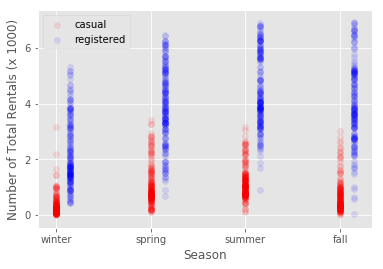

In [36]:
# scatterplot of season vs total rentals 
plot_season(bikes_by_day, 'Number of Total Rentals (x 1000)')

In [37]:
# first try at outlier detection for winter
bikes_by_day[(bikes_by_day.season == 1) & (bikes_by_day.counts > 7000)]

,counts,casual,weather,registered,season,weekday,windspeed,temp,atemp,hum
dteday,,,,,,,,,,
2012-03-17,7836,3155,2,4681,1,6,0.110704,0.514167,0.505046,0.755833


In [38]:
# find outlier of variable var_of_interest for season s
def find_outlier(s, var_of_interest, data):
    season_df = data[data.season == s]
    
    raw_data = season_df.loc[:,var_of_interest]
    q1 = np.percentile(raw_data,25)
    q3 = np.percentile(raw_data,75)
    IQR = q3 - q1
    
    upper_bound = q3 + 1.5*IQR 
    lower_bound = q1 - 1.5*IQR 
    
    outliers_flag = np.logical_or(raw_data>upper_bound, raw_data<lower_bound)
    
    if np.sum(outliers_flag) == 0:
        print ('no outliers found')
        return None
    else:
        return season_df.loc[outliers_flag]
    

In [39]:
# find total count outliers for winter
find_outlier(1, 'counts', bikes_by_day)

,counts,casual,weather,registered,season,weekday,windspeed,temp,atemp,hum
dteday,,,,,,,,,,
2012-03-17,7836,3155,2,4681,1,6,0.110704,0.514167,0.505046,0.755833


In [40]:
# find total count outliers for spring
find_outlier(2, 'counts', bikes_by_day) 

no outliers found


In [41]:
# find total count outliers for summer
find_outlier(3, 'counts', bikes_by_day)  

no outliers found


In [42]:
# find total count outliers for fall
find_outlier(4, 'counts', bikes_by_day) 

,counts,casual,weather,registered,season,weekday,windspeed,temp,atemp,hum
dteday,,,,,,,,,,
2012-10-29,22,2,3,20,4,1,0.3582,0.44,0.4394,0.88


<HR>
Your answer here<BR>
<BR>
<HR>

<HR>
We see that the total number of rentals tends to be smaller in the winter (season 1) which makes sense. It then increases in spring, peaks in summer and starts falling again in fall but not as much as in winter.

We observe that there is a value during the winter that is much higher that the others. This is our outlier. A search in the dataframe shows that this high value for bike rentals occurs on 2012-03-17. A web search for that date shows that it was **St. Patrick's Day**! So we concur that this is a real observation.

During the summer we see that 2011-08-27 is unusually low and it was the day of Hurricane Irene! We notice that does not show as an outlier in the boxplots, maybe because of the actual high count (1115). Maybe the hurricane was not so severe?

The outlier for Fall is 2012-10-29. We observe that only 22 rides were rented on 2012-10-29. A web search for that date shows that it was during **Hurricane Sandy**! 
<HR>

<div class='exercise'> <b> Question 3: Prepare the data for Regression </b> </div>

**3.1** Visualize and describe inter-dependencies among the following variables: `weekday`, `season`, `month`,`weather`, `temp`, `atemp`, `hum`, `windspeed`, `casual`,`registered`, `counts`. Note and comment on any strongly related variables.

**3.2** Convert the categorical attributes into multiple binary attributes using **one-hot encoding**. 


**3.3** Split the initial `bikes_df` dataset (with hourly data about rentals) in a train and test part. Do this in a 'stratified' fashion, ensuring that all months are equally represented in each set. Explain your choice for a splitting algorithm. We ask you to create your train and test set, but for consistency and easy checking we ask that, for the rest of this problem set, you use the train and test set provided in question below.

**3.4** Read `data/BSS_train.csv` and `data/BSS_test.csv` into dataframes `BSS_train` and `BSS_test`, respectively. After checking your train and test datasets for accuracy, remove the `dteday` column from both train and test dataset. We do not need it, and its format cannot be used for analysis. Also, remove any predictors that would make predicting the `count` trivial.

**3.5** Calculate the **Pearson correlation** coefficients between all the features. Visualize the matrix using a heatmap. Which among the predictors have a positive correlation with the number of bike rentals? For categorical attributes, you should use each binary predictor resulting from one-hot encoding to compute their correlations.  Identify pairs of variables with collinearity >0.7.

#### Hints: 
- You may use the `np.corrcoef` function to compute the correlation matrix for a data set (do not forget to transpose the data matrix). You may use `plt.pcolor` function to visualize the correlation matrix.



#### Answers

#### 3.1 Visualize and describe inter-dependencies  ... 

In [43]:
# your code here


<HR>
Your answer here<BR>
    <HR>

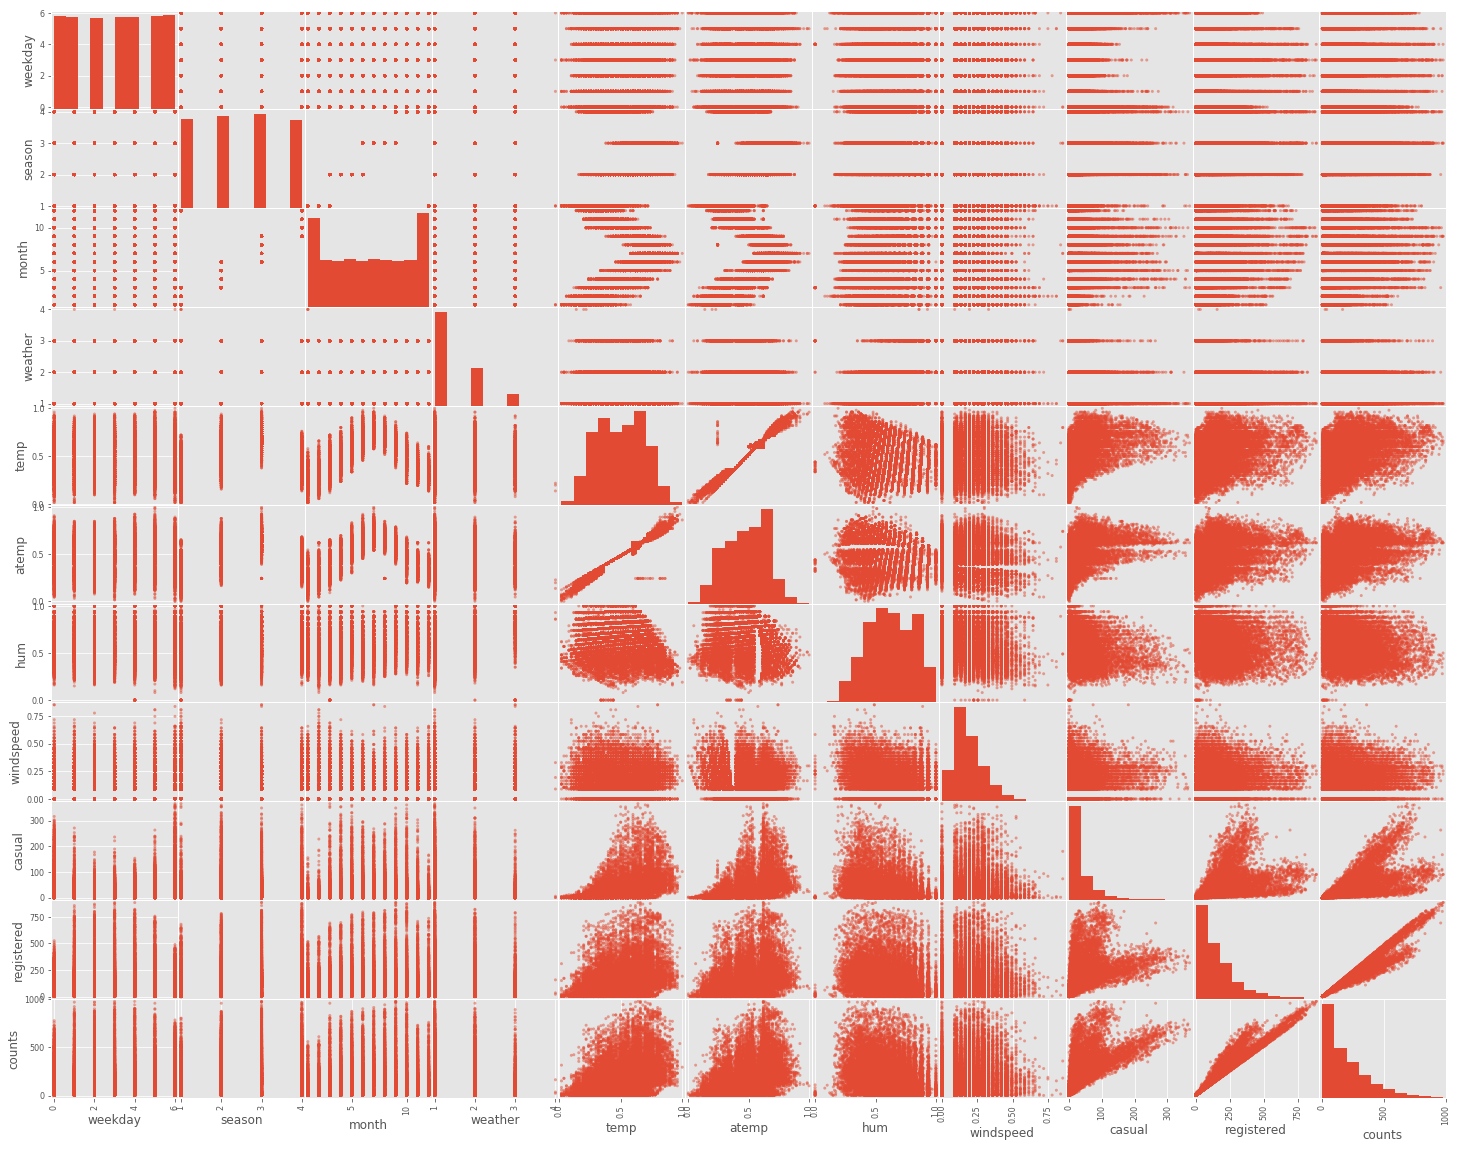

In [44]:
# make combinations of features
cols_wanted = ['weekday', 'season', 'month',
       'weather', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'counts']

scatter_matrix(bikes_df[cols_wanted], alpha=0.5, figsize=(25,20));

We see a clear linear dependency between total counts and temperature (both `temp` and `atemp` variables). We also notice that `atemp` and `temp` are nearly perfectly correlated. `month` and `season` are also obviously conveying the same information.

`registered` and `counts` are likewise correlated. We will examine those again later.

#### 3.2 Convert the categorical attributes  ....

In [45]:
# your code here


<HR>
Your answer here
<BR>
<HR>

In [46]:
#save the pre-recoding bikes data
bikes_df_raw = bikes_df.copy()

In [47]:
categorical_columns = ['season', 'month', 'holiday', 'weekday', 'workingday', 'weather']
categorical_columns_g2cols = ['season', 'month', 'weekday', 'weather']
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'counts']

bikes_df = pd.get_dummies(bikes_df, columns=categorical_columns_g2cols, drop_first=True)

In [48]:
bikes_df.head()

,dteday,hour,holiday,year,workingday,temp,atemp,hum,windspeed,casual,...,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3,weather_4
0,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0,3,...,0,0,0,0,0,0,1,0,0,0
1,2011-01-01,1,0,0,0,0.22,0.2727,0.80,0.0,8,...,0,0,0,0,0,0,1,0,0,0
2,2011-01-01,2,0,0,0,0.22,0.2727,0.80,0.0,5,...,0,0,0,0,0,0,1,0,0,0
3,2011-01-01,3,0,0,0,0.24,0.2879,0.75,0.0,3,...,0,0,0,0,0,0,1,0,0,0
4,2011-01-01,4,0,0,0,0.24,0.2879,0.75,0.0,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
# give more meaningful names to the one-hot encoded variables
seasons = {'season_2': 'spring', 'season_3': 'summer', 'season_4': 'fall',}
months = {'month_2': 'Feb', 'month_3': 'Mar', 'month_4': 'Apr',
       'month_5':'May', 'month_6': 'Jun', 'month_7': 'Jul', 'month_8': 'Aug', 'month_9': 'Sept', 'month_10': 'Oct',
       'month_11': 'Nov', 'month_12': 'Dec', }
weekdays = {'weekday_1': 'Mon', 'weekday_2': 'Tue', 'weekday_3': 'Wed',
       'weekday_4': 'Thu', 'weekday_5': 'Fri', 'weekday_6': 'Sat'}
weather = {'weather_2': 'Cloudy', 'weather_3': 'Snow', 'weather_4': 'Storm'}

combined_renamer = {**seasons, **months, **weekdays, **weather}

In [50]:
bikes_df = bikes_df.rename(columns=combined_renamer)

In [51]:
bikes_df.head()

,dteday,hour,holiday,year,workingday,temp,atemp,hum,windspeed,casual,...,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm
0,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0,3,...,0,0,0,0,0,0,1,0,0,0
1,2011-01-01,1,0,0,0,0.22,0.2727,0.80,0.0,8,...,0,0,0,0,0,0,1,0,0,0
2,2011-01-01,2,0,0,0,0.22,0.2727,0.80,0.0,5,...,0,0,0,0,0,0,1,0,0,0
3,2011-01-01,3,0,0,0,0.24,0.2879,0.75,0.0,3,...,0,0,0,0,0,0,1,0,0,0
4,2011-01-01,4,0,0,0,0.24,0.2879,0.75,0.0,0,...,0,0,0,0,0,0,1,0,0,0


#### 3.3 Split the initial bikes_df dataset...

In [52]:
# your code here


In [53]:
### split in train and test, keeping equal representation of each on month in train and test
bikes_train, bikes_test = train_test_split(bikes_df, test_size=.2, stratify=bikes_df_raw['month'])

In [54]:
bikes_train.head()

,dteday,hour,holiday,year,workingday,temp,atemp,hum,windspeed,casual,...,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm
2595,2011-04-23,1,0,0,0,0.32,0.3182,1.00,0.1940,5,...,0,0,0,0,0,0,1,1,0,0
5394,2011-08-17,16,0,0,1,0.82,0.7424,0.43,0.2239,62,...,0,0,0,1,0,0,0,0,0,0
17001,2012-12-16,4,0,1,0,0.34,0.3636,0.87,0.0000,1,...,1,0,0,0,0,0,0,1,0,0
5728,2011-09-01,3,0,0,1,0.58,0.5455,0.78,0.0896,7,...,0,0,0,0,1,0,0,0,0,0
168,2011-01-08,7,0,0,0,0.16,0.1818,0.74,0.1045,1,...,0,0,0,0,0,0,1,1,0,0


In [55]:
bikes_test.head()

,dteday,hour,holiday,year,workingday,temp,atemp,hum,windspeed,casual,...,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm
512,2011-01-23,11,0,0,0,0.14,0.1364,0.43,0.2239,22,...,0,0,0,0,0,0,0,0,0,0
7429,2011-11-11,4,1,0,0,0.30,0.2879,0.61,0.1940,0,...,0,0,0,0,0,1,0,0,0,0
13841,2012-08-04,22,0,1,0,0.76,0.7273,0.66,0.2836,104,...,0,0,0,0,0,0,1,0,0,0
4729,2011-07-20,23,0,0,1,0.76,0.7424,0.75,0.2537,26,...,0,0,0,1,0,0,0,0,0,0
5337,2011-08-15,7,0,0,1,0.60,0.5455,0.88,0.2537,10,...,0,1,0,0,0,0,0,0,0,0


#### 3.4  Read `data/BSS_train.csv` and `data/BSS_test.csv` into ...

In [56]:
# your code here


<HR>
Your answer here
<BR>
<HR>

In [57]:
bikes_train = pd.read_csv('data/BSS_train.csv', index_col=0).reset_index(drop=True)
bikes_train = bikes_train.drop(['dteday','casual','registered'], axis=1)

bikes_test = pd.read_csv('data/BSS_test.csv', index_col=0).reset_index(drop=True)
bikes_test = bikes_test.drop(['dteday','casual','registered'], axis=1)

In [58]:
bikes_train.head()

,hour,holiday,year,workingday,temp,atemp,hum,windspeed,counts,spring,...,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm
0,0,0,0,0,0.24,0.2879,0.81,0.0,16,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0.22,0.2727,0.80,0.0,40,0,...,0,0,0,0,0,0,1,0,0,0
2,2,0,0,0,0.22,0.2727,0.80,0.0,32,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0,0,0,0.24,0.2879,0.75,0.0,13,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,0,0,0.24,0.2879,0.75,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [59]:
bikes_test.head()

,hour,holiday,year,workingday,temp,atemp,hum,windspeed,counts,spring,...,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm
0,6,0,0,0,0.22,0.2727,0.80,0.0000,2,0,...,0,0,0,0,0,0,1,0,0,0
1,9,0,0,0,0.32,0.3485,0.76,0.0000,14,0,...,0,0,0,0,0,0,1,0,0,0
2,20,0,0,0,0.40,0.4091,0.87,0.2537,36,0,...,0,0,0,0,0,0,1,1,0,0
3,10,0,0,0,0.36,0.3485,0.81,0.2239,53,0,...,0,0,0,0,0,0,0,1,0,0
4,12,0,0,0,0.36,0.3333,0.66,0.2985,93,0,...,0,0,0,0,0,0,0,1,0,0


#### 3.5 Calculate the **Pearson correlation** ....

In [60]:
# your code here


In [61]:
# Find all correlations 
corr = bikes_train.corr()
corr

,hour,holiday,year,workingday,temp,atemp,hum,windspeed,counts,spring,...,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Cloudy,Snow,Storm
hour,1.000000,0.005028,-0.010900,0.002024,0.140745,0.136311,-0.274146,0.139770,0.394167,-0.003675,...,-0.008559,0.002398,0.002814,0.000877,-0.000289,-0.000661,-0.007787,-0.050553,0.020257,-0.005253
holiday,0.005028,1.000000,0.011641,-0.253523,-0.026372,-0.030072,-0.010085,-0.000291,-0.028252,-0.026538,...,0.003484,0.288895,-0.045881,-0.046017,-0.023697,-0.027916,-0.071661,0.007805,-0.021242,-0.002083
year,-0.010900,0.011641,1.000000,-0.000840,0.038813,0.037635,-0.086934,-0.008300,0.243886,-0.003334,...,-0.000215,0.003327,-0.003703,0.001554,0.003746,-0.000422,-0.010093,0.013921,-0.038232,-0.000110
workingday,0.002024,-0.253523,-0.000840,1.000000,0.056547,0.055666,0.020164,-0.009580,0.029534,0.022044,...,-0.019465,0.147598,0.268793,0.272720,0.260472,0.263344,-0.602438,0.022523,0.034080,-0.004647
temp,0.140745,-0.026372,0.038813,0.056547,1.000000,0.987408,-0.071756,-0.018421,0.406155,0.142863,...,-0.276243,-0.000895,0.025038,0.016462,0.021504,0.000682,-0.036657,-0.071525,-0.062334,-0.019716
atemp,0.136311,-0.030072,0.037635,0.055666,0.987408,1.000000,-0.053984,-0.058252,0.401119,0.151023,...,-0.267651,0.004153,0.027500,0.014942,0.021189,-0.007918,-0.037245,-0.068782,-0.068844,-0.021537
hum,-0.274146,-0.010085,-0.086934,0.020164,-0.071756,-0.053984,1.000000,-0.286629,-0.328232,0.002175,...,0.063829,0.013808,0.032100,0.042039,-0.042152,-0.024094,-0.019439,0.221191,0.309075,0.016521
windspeed,0.139770,-0.000291,-0.008300,-0.009580,-0.018421,-0.058252,-0.286629,1.000000,0.093981,0.063466,...,-0.033493,-0.002639,0.008295,-0.009246,0.005465,-0.014696,0.018772,-0.052600,0.077704,0.006998
counts,0.394167,-0.028252,0.243886,0.029534,0.406155,0.401119,-0.328232,0.093981,1.000000,0.058418,...,-0.080273,-0.009796,-0.004783,0.006535,0.018731,0.015080,0.000878,-0.050171,-0.130511,-0.010548
spring,-0.003675,-0.026538,-0.003334,0.022044,0.142863,0.151023,0.002175,0.063466,0.058418,1.000000,...,-0.177812,0.009869,0.000596,0.007562,-0.003677,0.002232,-0.006187,-0.007358,0.018801,-0.006984


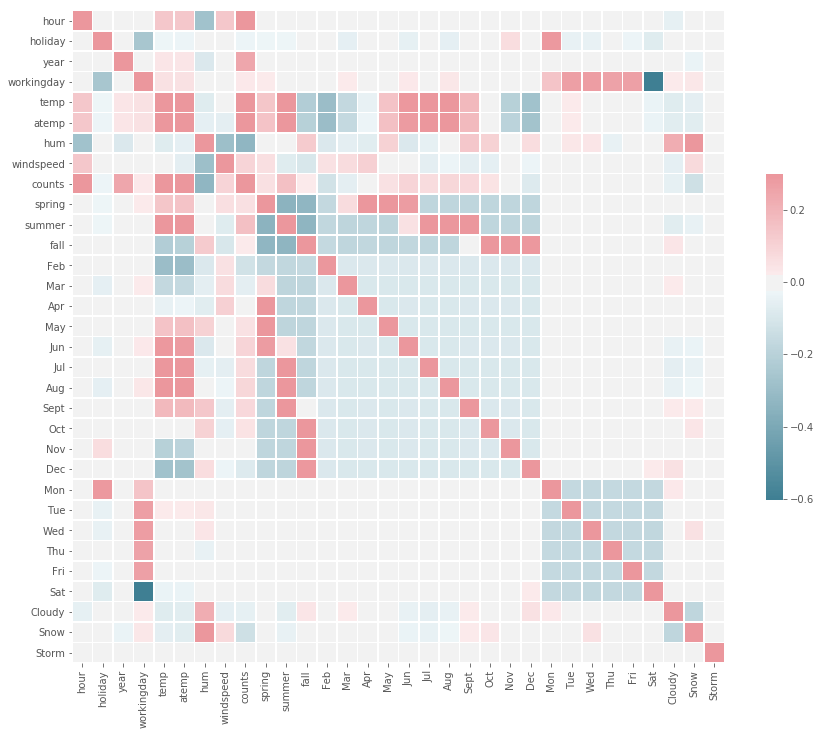

In [62]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5});

There are a number of highly co-linear predictors.

In [63]:
# Iterate over the pairs of indexes to enumerate which pairs are highly correlated

print("Unique variables with absolute correlations > .7:")
for row_name in corr.index:
    for col_name in corr.index:
        # col_name < row_name excludes correlations between a variable
        # and itself, as well as repeat pairings.
        if np.abs(corr.loc[row_name,col_name])> .7 and col_name < row_name:
            print("(",row_name,",",col_name,")")

Unique variables with absolute correlations > .7:
( temp , atemp )


<HR>

There are a number of highly co-linear predictors.  Seasons tend to correlate with temperatures.  Working days tend to correlate with days of the week.  Different weather statuses tend to strongly negatively correlate.  The only distinct variables which had a correlation with magnitude greater than .7 was temp and average temp.  As to be expected, these are strongly correlated (with correlation roughly .98).

<HR>

<div class='exercise'> <b> Question 4: Multiple Linear Regression </b> </div>

**4.1** Use statsmodels to fit a multiple linear regression model to the training set, and report its $R^2$ score on the test set.


**4.2** Find out which of estimated coefficients are statistically significant at a significance level of 5% (p-value < 0.05). Comment on the results.


**4.3** Make a plot of residuals of the fitted model ${e} = y - \hat{y}$ as a function of the predicted value $\hat{y}$. Note that this is different from the residual plot for simple linear regression. Draw a horizontal line denoting the zero residual value on the Y-axis. Does the plot reveal a non-linear relationship between the predictors and response? What does the plot convey about the variance of the error terms? 

### Answers
#### 4.1

In [64]:
# your code here


<HR>
Your answer here<BR>
<BR>
<HR>

In [65]:
# multiple linear regression
X_train = sm.add_constant(bikes_train.drop('counts', axis=1))
X_test = sm.add_constant(bikes_test.drop('counts', axis=1))
Y_train = bikes_train['counts'].values.reshape(-1,1)
Y_test = bikes_test['counts'].values.reshape(-1,1)

model = OLS(Y_train, X_train)
results = model.fit()

y_hat_train = results.predict()
y_hat_test = results.predict(exog=X_test)

print('Parameters: \n', results.params)

Parameters: 
 const         -21.083012
hour            7.221382
holiday       -18.095798
year           76.351903
workingday     11.317765
temp          333.248241
atemp          74.631221
hum          -205.495864
windspeed      22.516841
spring         43.154064
summer         29.542551
fall           68.595334
Feb            -7.643028
Mar           -11.673687
Apr           -41.524384
May           -33.292706
Jun           -65.803934
Jul           -93.480482
Aug           -59.208113
Sept          -16.051747
Oct           -16.160150
Nov           -25.873181
Dec           -10.204251
Mon            -2.660099
Tue            -6.142458
Wed             2.296440
Thu            -3.161076
Fri             2.889160
Sat            14.945929
Cloudy          6.786806
Snow          -28.285890
Storm          42.356939
dtype: float64


In [66]:
# calculating and reporting the requested values, particularly the Test R^2
print('Train R^2 = {:.4}'.format(results.rsquared))
print('Test R^2 = {:.4}'.format(r2_score(bikes_test['counts'], y_hat_test)))

Train R^2 = 0.4065
Test R^2 = 0.4064


In [1]:
results.summary()

NameError: name 'results' is not defined

#### 4.2

<HR>
Your answer here<BR>
<HR>

In [67]:
results.pvalues[((results.pvalues < 0.005) & (results.params > 0))]

hour           0.000000e+00
year          6.205883e-218
workingday     3.905740e-05
temp           4.767468e-14
spring         6.082058e-09
summer         7.609902e-04
fall           6.106365e-20
Sat            6.490550e-04
dtype: float64

In [68]:
results.pvalues[((results.pvalues < 0.005) & (results.params < 0))]

hum     2.797780e-149
Apr      2.640964e-05
May      1.592599e-03
Jun      8.447047e-10
Jul      1.110753e-14
Aug      5.685359e-07
Snow     4.454966e-09
dtype: float64

<HR>

The statistically significant variables with positive correlation: hour, year, workingday, temp, spring, summer, fall, Sat.

The statistically significant variables with negative correlation: the intercept, hum, Apr, May, Jun, Jul, Aug, Snow.

Most of these variables display a clear connection to factors reasonably believed to influence if someone would go biking, namely, temperature, humidity, weather, time of day, and day of the week.  In some cases, those particular variables are literally in our list of statistically siginificant variables.  In most of the remaining cases, the variable appears to heavily influence the preceding factors.

Year is worth noting as a positive correlation.  This indicates that ridership increased from 2011 to 2012, a likely event as the bike program grew.

<HR>

#### 4.3

In [69]:
# your code here


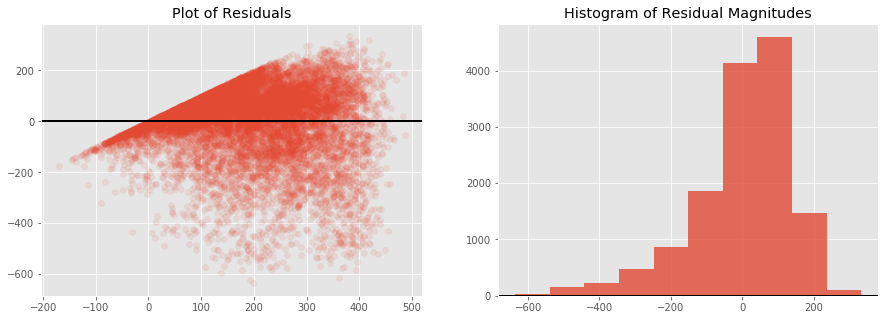

In [70]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_title('Plot of Residuals')
axes[0].scatter(y_hat_train, y_hat_train - Y_train[:,0], alpha=0.1)
axes[0].axhline(0, c='black', lw=2)

axes[1].set_title('Histogram of Residual Magnitudes')
axes[1].hist(y_hat_train - Y_train[:,0], alpha=0.8)
axes[1].axhline(0, c='black', lw=2)
plt.show()

We see that linear regression is a poor model for this data.  On the left, the variance of the residuals increases as y-hat increases, while there is also a pattern to the residuals (not uniform around zero) suggesting there is more than linear behavior needing to be modeled.

### Question 5: Subset Selection

**5.1** Implement forward step-wise  selection to select a minimal subset of predictors that are related to the response variable: 

We require that you implement the method **from scratch**. You may use the Bayesian Information Criterion (BIC) to choose the subset size in each method. 

**5.2** Do these methods eliminate one or more of the redundant predictors (if any) identified in Question 3.2? 

**5.3** In each case, fit linear regression models using the identified subset of predictors to the training set. How do the test $R^2$ scores for the fitted models compare with the model fitted in Question 4 using all predictors?

### Answers

#### 5.1  Implement forward step-wise ....

In [71]:
# your code here


<HR>
Your answer here<BR>
<BR>
<HR>

In [72]:
def step_forwards_backwards(df, response_var, direction='forward'):
    
    assert direction in ['forward', 'backward']
    
    y = df[response_var].values.reshape(-1,1)

    predictors = set(df.drop('counts', axis=1).columns)
    selected_predictors = set() if direction=='forward' else set(predictors)
    
    n = df.shape[0]
    best_bic = np.inf
    
    best_bics = []
    best_models = []
    
    if direction == 'forward':
        X = np.ones(n).reshape(-1,1)
        X = np.concatenate([X, df[list(selected_predictors)].values], axis=1)
        while (True):
            
            possible_bic_scores = []
            possible_predictors = list(selected_predictors ^ predictors)
            
            if len(possible_predictors) == 0:
                break
                
            for predictor in possible_predictors:
                
                x_temp = np.concatenate([X, df[predictor].values.reshape(-1,1)], axis=1)
                model = OLS(endog=y, exog=x_temp).fit()
                bic = model.bic
                possible_bic_scores.append(bic)
                
            best_predictor_ix = np.argmin(possible_bic_scores)
            best_predictor = possible_predictors[best_predictor_ix]
            
            best_bic = np.min(possible_bic_scores)
            best_bics.append(best_bic)
            
            selected_predictors.add(best_predictor)            
            X = np.concatenate([X, df[best_predictor].values.reshape(-1,1)], axis=1)
            best_models.append(list(selected_predictors))

    else:

        while (True):
            possible_bic_scores = []
            possible_predictors = list(selected_predictors)

            if len(possible_predictors) == 0:
                break

            for predictor in possible_predictors:
                X = np.concatenate([np.ones(n).reshape(-1,1), 
                                    df[list(selected_predictors - set([predictor]))].values], axis=1)
                model = OLS(endog=y, exog=X).fit()
                bic = model.bic
                possible_bic_scores.append(bic)

            best_predictor_ix = np.argmin(possible_bic_scores)
            best_predictor = possible_predictors[best_predictor_ix] 

            best_bic = possible_bic_scores[best_predictor_ix]
            selected_predictors.discard(best_predictor)
            
            best_bics.append(best_bic)
            best_models.append(list(selected_predictors))
            
    index_of_best_bic = np.argmin(best_bics)

    return best_models[index_of_best_bic]

In [73]:
predictors_forward = step_forwards_backwards(bikes_train, 'counts', direction='forward')
predictors_forward

['hum',
 'Aug',
 'Jul',
 'hour',
 'Jun',
 'Snow',
 'year',
 'temp',
 'spring',
 'fall',
 'holiday']

OR

In [74]:
predictors_backward = step_forwards_backwards(bikes_train, 'counts', direction='backward')
predictors_backward

['hum',
 'Aug',
 'hour',
 'Jun',
 'Sat',
 'temp',
 'spring',
 'fall',
 'Jul',
 'year',
 'workingday',
 'Snow']

#### 5.2 Do these methods eliminate ...

<HR>
Your answer here<BR>
<BR>
<HR>

In [75]:
# the original set of predictiors
predictors = set(results.pvalues[((results.pvalues < 0.05) & (results.params > 0))].index).union(set(results.pvalues[((results.pvalues < 0.05) & (results.params < 0))].index))

print("Predictors removed by stepping backward:")

# the predictors removed by stepping backward
print(predictors.difference(set(predictors_backward)))

print("Predictors removed by stepping forward:")


# the predictors removed by stepping forward
print(predictors.difference(set(predictors_forward)))


Predictors removed by stepping backward:
{'const', 'Apr', 'summer', 'Nov', 'May', 'windspeed', 'Cloudy', 'holiday'}
Predictors removed by stepping forward:
{'Sat', 'const', 'Apr', 'summer', 'Nov', 'May', 'workingday', 'Cloudy', 'windspeed'}


<HR>

Yes.  In problem 4, we found about 20 variables which were statistically significant.  With the stepping forward or backward, we are using only about half of those variables.  Whereas the fuller model might use holidays and working days, stepping forward or backward opted for one of the two.

Instead of keeping 6 months and 2 seasons, the reduced models keeps half as many months and seasonal designations.

Generally, stepping forward/backward appears to be removing redundancies.

<HR>

#### 5.3 In each case, fit linear regression  ...

In [76]:
# your code here


<HR>
Your answer here<BR>
<BR>
<HR>

In [77]:
X_forward = sm.add_constant(bikes_train[predictors_forward])
X_forward_test = sm.add_constant(bikes_test[predictors_forward])
y = bikes_train['counts'].values.reshape(-1,1)

model = OLS(endog=y, exog=X_forward)
result = model.fit()

y_hat_train = result.predict()
y_hat_test = result.predict(exog=X_forward_test)

print('train r2 = {:.4}'.format( r2_score(bikes_train['counts'], y_hat_train)))
print('test r2 = {:.4}'.format(r2_score(bikes_test['counts'], y_hat_test)))

train r2 = 0.4038
test r2 = 0.4047


<HR>

In the original full model, our $R^2$ was about .406 on both the training and test sets.  With the two restricted models, our $R^2$ values are only diminished by about .002.  It appears that in discarding extra features, we have not significantly diminished the predictive power of our model.

<HR>

<div class='exercise'> <b> Question 6: Polynomial Regression </b> </div> 

Moving beyond linear models, we will now try to improve the performance of the regression model  by including higher-order polynomial and interaction terms. 

**6.1** For each continuous predictor $X_j$, include additional polynomial terms $X^2_j$, $X^3_j$, and $X^4_j$, and fit a polynomial regression model to the expanded training set. How does the $R^2$ of this model on the test set compare with that of the linear model fitted in the previous question? Using a t-test, find out which of the estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%. 

In [3]:
# your code here

<HR>
Your answer here
<HR>

In [78]:
# Create dataframe of higher order polynomials on a feature column up to order k
def gen_higher_order_features(df, feature_column, k):
    
    poly_model = PolynomialFeatures(k, include_bias=False)
    
    feature_data = df[feature_column]
    
    # transform to get all the polynomial features of this column
    higher_orders = poly_model.fit_transform(feature_data.values.reshape(-1,1))
    
    feature_names = poly_model.get_feature_names([feature_column])

    return pd.DataFrame(higher_orders[:,1:], columns = feature_names[1:])

In [79]:
# your code here

# define continuous features 
continuous_columns = ['temp', 'atemp', 'hum', 'windspeed']

# generate higher order dfs -- use X_train_intercept and X_test_intercept since
# we'll be using OLS
higher_orders_train =[gen_higher_order_features(X_train, feature, 4) for feature in continuous_columns]
higher_orders_test = [gen_higher_order_features(X_test, feature, 4) for feature in continuous_columns]

higher_orders_train = pd.concat(higher_orders_train, axis=1)
higher_orders_test = pd.concat(higher_orders_test, axis=1)

higher_orders_columns = higher_orders_train.columns

# scale higher order polynomial features
scaler = preprocessing.StandardScaler().fit(higher_orders_train)

higher_orders_train[higher_orders_columns] = scaler.transform(higher_orders_train)
higher_orders_test[higher_orders_columns] = scaler.transform(higher_orders_test)

# concatenate to get the full data frames
X_poly_train = pd.concat([X_train, higher_orders_train], axis=1)
X_poly_test = pd.concat([X_test, higher_orders_test], axis=1)

In [80]:
model_poly = OLS(endog=Y_train, exog=X_poly_train).fit()
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     241.2
Date:                Sat, 21 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:05:04   Log-Likelihood:                -88119.
No. Observations:               13903   AIC:                         1.763e+05
Df Residuals:                   13860   BIC:                         1.766e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -875.2804    196.735     -4.449      0.000   -1260.908    -489.653
hour            7.0982      0.183     38.815      0.000       6.740       7.457
holiday       -19.9687      6.527     -3.059      0.002     -32.763      -7.175
year           79.1663      2.383     33.217      0.000      74.495      83.838
workingday     11.5480      2.721      4.244      0.000       6.214      16.882
temp          -98.4860    500.457     -0.197      0.844   -1079.449     882.477
atemp         972.1010    562.472      1.728      0.084    -130.421    2074.623
hum           808.4325    233.754      3.458      0.001     350.243    1266.622
windspeed      -4.8944     71.765     -0.068      0.946    -145.564     135.776
spring         42.1280      7.348      5.733      0.000      27.724      56.532
summer         21.2722      8.703      2.444      0.015       4.213      38.331
fall           67.7929      7.434      9.120      0.000      53.222      82.364
Feb             6.6054      6.034      1.095      0.274      -5.222      18.433
Mar            12.1869      6.872      1.773      0.076      -1.283      25.657
Apr           -18.8035      9.975     -1.885      0.059     -38.356       0.749
May           -24.9693     10.567     -2.363      0.018     -45.681      -4.257
Jun           -69.8240     10.710     -6.519      0.000     -90.817     -48.831
Jul           -92.0230     12.059     -7.631      0.000    -115.660     -68.386
Aug           -64.1045     11.886     -5.393      0.000     -87.404     -40.805
Sept           -7.2505     10.710     -0.677      0.498     -28.243      13.742
Oct             8.3218     10.013      0.831      0.406     -11.305      27.948
Nov            -0.5760      9.667     -0.060      0.952     -19.525      18.373
Dec             9.2113      7.752      1.188      0.235      -5.984      24.407
Mon            -4.8463      2.945     -1.645      0.100     -10.619       0.927
Tue            -6.9005      3.172     -2.175      0.030     -13.118      -0.683
Wed             1.0496      3.148      0.333      0.739      -5.122       7.221
Thu            -2.2895      3.153     -0.726      0.468      -8.469       3.890
Fri             4.5660      3.159      1.445      0.148      -1.626      10.758
Sat            15.5005      4.330      3.580      0.000       7.013      23.988
Cloudy          7.2913      2.872      2.539      0.011       1.662      12.921
Snow          -24.9330      4.967     -5.019      0.000     -34.670     -15.196
Storm          31.0141     97.153      0.319      0.750    -159.419     221.447
temp^2       -676.4812    336.497     -2.010      0.044   -1336.061     -16.902
temp^3       1440.8468    401.386      3.590      0.000     654.075    2227.618
temp^4       -707.1992    160.141     -4.416      0.000   -1021.096    -393.302
atemp^2       -61.3123    330.782     -0.18

In [81]:
y_hat_train_poly = model_poly.predict()
y_hat_test_poly = model_poly.predict(exog=X_poly_test)
print('In-sample R^2 of polynomial features model is: {:.4}'.format(r2_score(Y_train, y_hat_train_poly)))
print('Out-of-sample R^2 of polynomial features model is: {:.4}'.format(r2_score(Y_test, y_hat_test_poly)))

In-sample R^2 of polynomial features model is: 0.4223
Out-of-sample R^2 of polynomial features model is: 0.4203


<HR>

Again, the $R^2$ for the original model was about .406 on training set and test sets.  For our poly-model, the $R^2$ values have increased to around .420 for the training and test sets.  This represents a pretty good improvement in model performance.

<HR>

In [82]:
print("Statistically significant predictors: ", 
      list(model_poly.params[model_poly.pvalues < 0.05].keys()))

Statistically significant predictors:  ['const', 'hour', 'holiday', 'year', 'workingday', 'hum', 'spring', 'summer', 'fall', 'May', 'Jun', 'Jul', 'Aug', 'Tue', 'Sat', 'Cloudy', 'Snow', 'temp^2', 'temp^3', 'temp^4', 'hum^2', 'hum^3', 'hum^4', 'windspeed^2', 'windspeed^3', 'windspeed^4']


# Part B [20 pts]:  Written Report to the Administrators
<br>

<div class='exercise'> <b> Question 7 </b> </div>

Write a short repost stating some of your findings on how the administrators can increase the system revenue. You might want to include suggestions such as what model to use to predict ridership, what additional services to provide, or when to give discounts, etc. 
Include your report as a pdf file in canvas. The report should not be longer than one page and should include maximum 5 figures. 

### Answers
#### 7
<HR>
Your report here <BR>
<HR>



Looking at the linear regression models, temperature, weather severity, humidity, and time of day appear to be the driving forces in modeling counts.  Some facsimile of this presents itself when we do a full regression, the step forward regression, or step backward regression.

### You might want to include suggestions such as what model to use to predict ridership:

All of the models we calculated run about the same in terms of $R^2$.  For the best result, using the polymodel with up to quadratic terms gives the best regression.  There is no reason to assume that the continuous variables should have a strictly linear effect, particularly as hour of the day should have positive impact at the middle of the day, and negative impact at the ends of the day (this was borne out by the regression and statistically significant variables).  Consequently, we opt for the polynomial model.

### What additional services to provide:

Noting that ridership is diminished in the winter, in a statistically siginificant way, heated seats or handlebar mounted gloves might help casual riders overcome the cold, particularly on days that are cold, but otherwise good weather.

### When to give discounts:

In the winter when the temperature is low, discounts may help increase ridership, but in the warmer months, there is greater variance to ridership, and a higher mean ridership.  Offering a discount on a high humidity day may exploit the inherently higher variance and mean to give a more significant boost in ridership.

### Worth further exploration:

Predicting registered or casual counts separately: the two features function in very distinct ways, and trying to predict their relative counts without intermingling allows for much greater correlation with fewer variables.

<HR>



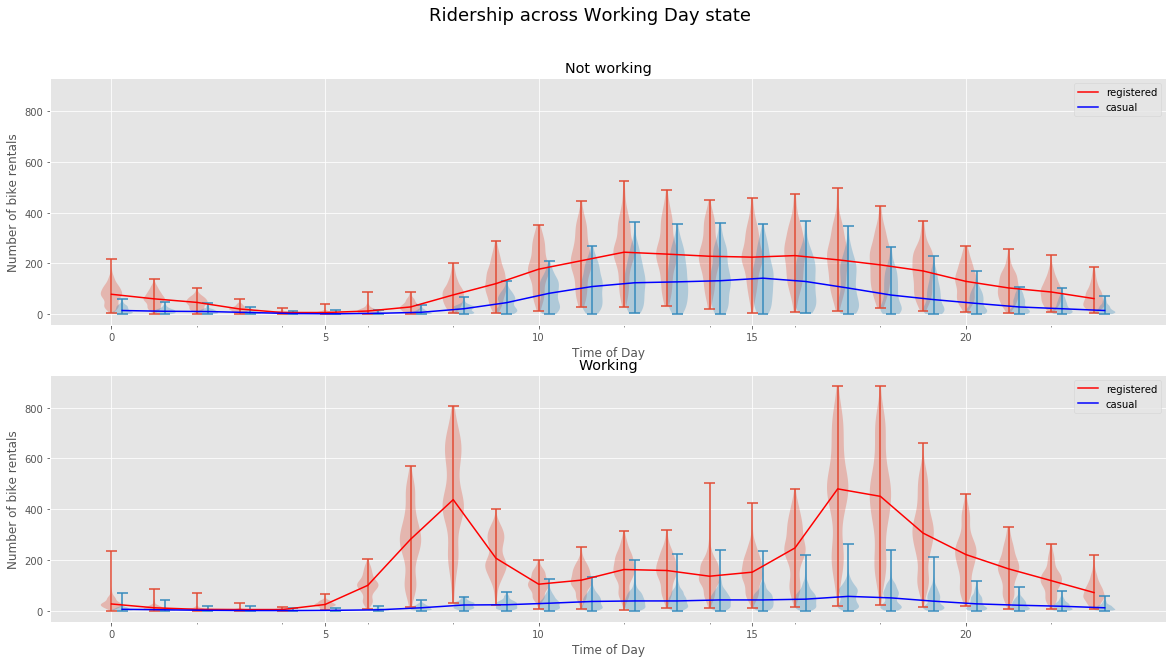

In [65]:

fig, ax = plt.subplots(2,1, figsize=(20,10), sharey=True)
ax = ax.ravel()

working_strings = ["Not working","Working"]
for working in [0,1]:
    cur_ax = ax[working]
    cur_working_string = working_strings[working]

    bikes_df_working = bikes_df[((bikes_df.workingday == working) & (bikes_df.holiday != 1))]


    reg_hourly_data,cas_hourly_data = get_hourly_violin_lists(bikes_df_working)
    reg = cur_ax.violinplot(dataset=reg_hourly_data, positions=np.arange(24))
    cas = cur_ax.violinplot(dataset=cas_hourly_data, positions=np.arange(24)+.25)

    reg_hourly_data_median= [np.median(q) for q in reg_hourly_data]
    cas_hourly_data_median= [np.median(q) for q in cas_hourly_data]

    cur_ax.plot(reg_hourly_data_median, 'r', label="registered")
    cur_ax.plot(np.arange(24)+.25,cas_hourly_data_median, 'b', label="casual")
    
    cur_ax.legend()

    cur_ax.set_xticks(list(ticks_dict.keys()), list(ticks_dict.values()))
    cur_ax.set_ylabel('Number of bike rentals')
    cur_ax.set_xlabel('Time of Day')
    cur_ax.set_title(working_strings[working])

plt.suptitle("Ridership across Working Day state",fontsize = 18)
plt.show()

<HR>

The working day counts for registered riders appears bimodal.  This seems to contribute to a high mean and high variance for registered riders during the working week.  Given that registered rider count is high and registered ridership on working days is also high variance, sporadic discounts on working days to try to select for the higher mode may be particularly effective for boosting business.

<HR>

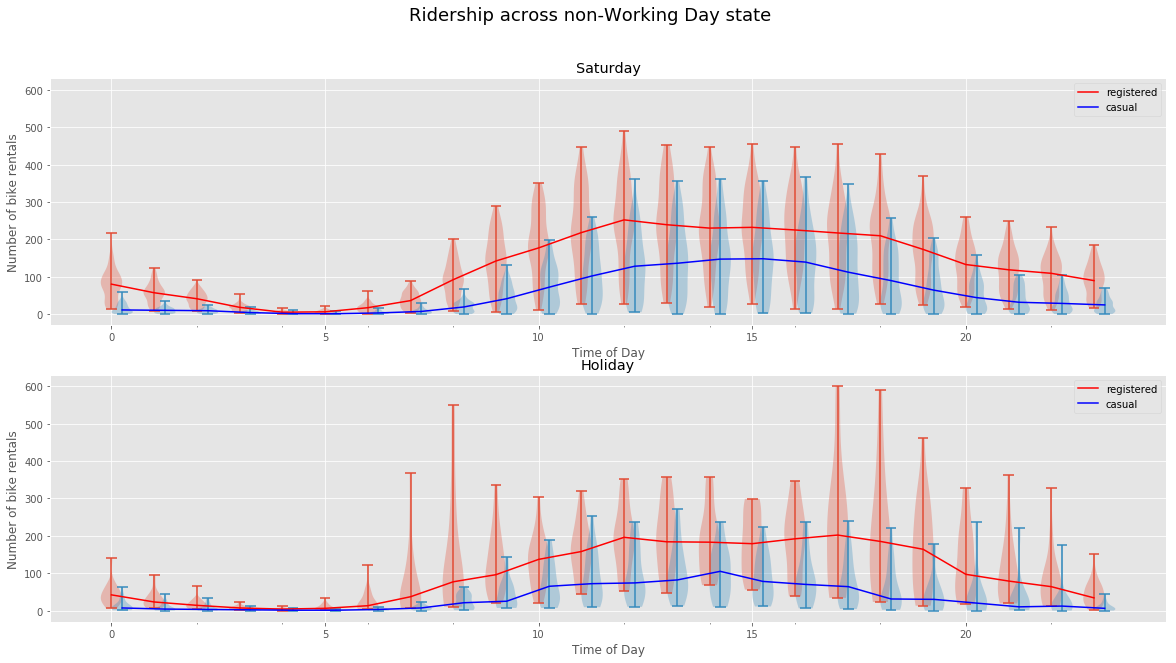

In [66]:
fig, ax = plt.subplots(2,1, figsize=(20,10), sharey=True)
ax = ax.ravel()

# Saturday data
cur_ax = ax[0]

bikes_df_sub = bikes_df[((bikes_df.Sat == 1))]

reg_hourly_data,cas_hourly_data = get_hourly_violin_lists(bikes_df_sub)
reg = cur_ax.violinplot(dataset=reg_hourly_data, positions=np.arange(24))
cas = cur_ax.violinplot(dataset=cas_hourly_data, positions=np.arange(24)+.25)

reg_hourly_data_median= [np.median(q) for q in reg_hourly_data]
cas_hourly_data_median= [np.median(q) for q in cas_hourly_data]

cur_ax.plot(reg_hourly_data_median, 'r', label="registered")
cur_ax.plot(np.arange(24)+.25,cas_hourly_data_median, 'b', label="casual")

cur_ax.legend()

cur_ax.set_xticks(list(ticks_dict.keys()), list(ticks_dict.values()))
cur_ax.set_ylabel('Number of bike rentals')
cur_ax.set_xlabel('Time of Day')
cur_ax.set_title("Saturday")


# Holiday data
cur_ax = ax[1]

bikes_df_sub = bikes_df[((bikes_df.holiday == 1))]

reg_hourly_data,cas_hourly_data = get_hourly_violin_lists(bikes_df_sub)
reg = cur_ax.violinplot(dataset=reg_hourly_data, positions=np.arange(24),)
cas = cur_ax.violinplot(dataset=cas_hourly_data, positions=np.arange(24)+.25)

reg_hourly_data_median= [np.median(q) for q in reg_hourly_data]
cas_hourly_data_median= [np.median(q) for q in cas_hourly_data]

cur_ax.plot(reg_hourly_data_median, 'r', label="registered")
cur_ax.plot(np.arange(24)+.25,cas_hourly_data_median, 'b', label="casual")

cur_ax.legend()

cur_ax.set_xticks(list(ticks_dict.keys()), list(ticks_dict.values()))
cur_ax.set_ylabel('Number of bike rentals')
cur_ax.set_xlabel('Time of Day')
cur_ax.set_title("Holiday")

plt.suptitle("Ridership across non-Working Day state",fontsize = 18)
plt.show()

<HR>

On weekends, registered riders appear to function similarly to casual riders, but on holidays, registered riders appear to function differently than their casual counterparts.  They appear to reduce in numbers, but follow distributions as if it was a working day with errands and chores.  A possible discount on holidays might keep the registered numbers from taking a full day off and not renting a bike.

<HR>